1. Importation des librairies nécessaires

In [2]:
# Importation des librairies nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

2. Chargement du Dataset

In [3]:
# Charger le dataset
df = pd.read_csv('openfoodfacts.csv', sep='\t')
df.head()


C:\Users\SOTA tangy-laurelle\AppData\Local\Temp\ipykernel_97716\2845342769.py:2: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('openfoodfacts.csv', sep='\t')


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3. Dataset Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [5]:
df.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


In [6]:
df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)

In [7]:
df.shape

(320772, 162)

4. Identification et Traitement des Valeurs Manquantes

In [49]:
# Identification des valeurs manquantes
missing_values = df.isnull().sum()
print(missing_values)

code                           23
url                            23
creator                         2
created_t                       3
created_datetime                9
                            ...  
carbon-footprint_100g      320504
nutrition-score-fr_100g     99562
nutrition-score-uk_100g     99562
glycemic-index_100g        320772
water-hardness_100g        320772
Length: 162, dtype: int64


In [80]:
# Calculer le pourcentage de valeurs manquantes par colonne
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})


,Missing Values,Percentage
code,23,0.007170
url,23,0.007170
creator,2,0.000623
created_t,3,0.000935
created_datetime,9,0.002806
...,...,...
carbon-footprint_100g,320504,99.916452
nutrition-score-fr_100g,99562,31.038245
nutrition-score-uk_100g,99562,31.038245
glycemic-index_100g,320772,100.000000


In [50]:
#Supprimer les variables dont ses valeurs manquantes depassent 60%
trop = len(df) * 0.6
col_drop = df.columns[df.isnull().sum() > trop]
col_drop
df_bis = df.drop(columns=col_drop)

In [51]:
# Identification des valeurs manquantes
missing_values = df_bis.isnull().sum()
print(missing_values)

code                                           23
url                                            23
creator                                         2
created_t                                       3
created_datetime                                9
last_modified_t                                 0
last_modified_datetime                          0
product_name                                17762
brands                                      28412
brands_tags                                 28420
countries                                     280
countries_tags                                280
countries_fr                                  280
ingredients_text                            71810
serving_size                               109441
additives_n                                 71833
additives                                   71867
additives_tags                             166092
additives_fr                               166092
ingredients_from_palm_oil_n                 71833


In [52]:
df_bis

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,...,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0,14.0
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,...,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0,0.0
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,grizzlies,...,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,12.0,12.0
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,bob-s-red-mill,...,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,Panzani,panzani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,trader-joe-s,...,0.0,0.00,0.00000,0.000,0.0,0.0000,0.000,0.00000,0.0,0.0
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,乐吧,乐吧,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,Knorr,knorr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# Drop rows with missing data in columns: 'code', 'creator', 'created_datetime'
df_bis = df_bis.dropna(subset=['code', 'creator', 'created_datetime'])

In [54]:
# Drop unnecessary columns
df_bis = df_bis.drop(columns=['states', 'states_tags', 'states_fr']) 

In [55]:
# Replace missing values with "NA" in columns
df_bis = df_bis.fillna({'product_name': "NA", 'brands': "NA", 'brands_tags': "NA"})

In [56]:
# Check the rest of missing values
missing_values = df_bis.isnull().sum()
print(missing_values)

code                                            0
url                                             0
creator                                         0
created_t                                       0
created_datetime                                0
last_modified_t                                 0
last_modified_datetime                          0
product_name                                    0
brands                                          0
brands_tags                                     0
countries                                     280
countries_tags                                280
countries_fr                                  280
ingredients_text                            71808
serving_size                               109439
additives_n                                 71808
additives                                   71842
additives_tags                             166067
additives_fr                               166067
ingredients_from_palm_oil_n                 71808


In [57]:
# SCikit-learn 
! pip install scikit-learn


In [58]:
# Change column type to string for column: 'countries'
df_bis = df_bis.astype({'countries_fr': 'string'})

# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df_bis, columns=['countries_fr'])

# Imputation using KNN Algorithm
from sklearn.impute import KNNImputer
columns_to_impute = [col for col in df_encoded.columns if 'countries_fr' in col]

# Initialize
imputer = KNNImputer(n_neighbors=5)


# KNN Imputation
imputed_data = imputer.fit_transform(df_encoded[columns_to_impute])

# Convert the imputed data into a dataframe
new_df = pd.DataFrame(imputed_data, columns = columns_to_impute)

# Replace the original columns to new ones
df_encoded[columns_to_impute] = new_df


In [59]:
new_df.head()

,countries_fr_Afrique du Sud,countries_fr_Albanie,"countries_fr_Albanie,Danemark,Italie","countries_fr_Albanie,Italie",countries_fr_Algérie,"countries_fr_Algérie,Belgique,Brésil,Cameroun,Canada,France,Allemagne,Inde,Italie,Luxembourg,Mali,Martinique,Maroc,Pays-Bas,Nouvelle-Calédonie,Portugal,La Réunion,Arabie saoudite,Sénégal,Espagne,Suisse,Royaume-Uni,États-Unis","countries_fr_Algérie,Belgique,Canada,France,Allemagne,Italie,Mali,Martinique,Espagne,Suisse","countries_fr_Algérie,Belgique,Canada,France,Maroc,Suisse","countries_fr_Algérie,Belgique,Canada,France,Polynésie française,Allemagne,Irlande,Italie,Liban,Luxembourg,Mali,Martinique,Maroc,Pays-Bas,Nouvelle-Calédonie,Portugal,La Réunion,Espagne,Suisse,Tunisie,Royaume-Uni,États-Unis","countries_fr_Algérie,Belgique,France,Allemagne,Guadeloupe,Italie,Liban,Luxembourg,Martinique,Maroc,Pays-Bas,Portugal,La Réunion,Sénégal,Espagne,Suisse,Royaume-Uni",...,"countries_fr_États-Unis,en:Nederland","countries_fr_États-Unis,en:Niederlande","countries_fr_États-Unis,en:Other-日本,en:日本","countries_fr_États-Unis,en:Pays-bas","countries_fr_États-Unis,en:Казахстан","countries_fr_États-Unis,en:ประเทศออสเตรเลีย,en:ประเทศไทย,en:สหราชอาณาจักร","countries_fr_États-Unis,en:香港","countries_fr_États-Unis,Îles Vierges des États-Unis",countries_fr_Éthiopie,countries_fr_Îles Cook
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
# Now, I want to reverse the encodage after the imputation
# Use idxmax to reverse the one-hot encoding (it will find the column with the highest value for each row)
df_encoded['countries_fr'] = df_encoded[columns_to_impute].idxmax(axis=1)

# Remove the 'countries_fr_' prefix to get back the original category names
df_encoded['countries_fr'] = df_encoded['countries_fr'].str.replace('countries_fr_', '')

# Replace the original 'countries_fr' in df_bis with the imputed version from df_encoded
df_bis['countries_fr'] = df_encoded['countries_fr']


In [61]:
df_bis.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,...,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NA,NA,...,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0,14.0
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,...,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0,0.0
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,grizzlies,...,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,12.0,12.0
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,bob-s-red-mill,...,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# Since we have the col countries_fr, we don't need the column countries and countries_tags
# Drop columns
df_bis = df_bis.drop(columns=['countries', 'countries_tags'])

In [63]:
# Missing values in countries_fr are now <1%
# We can now fill the missing values with 'NA'

df_bis = df_bis.fillna({'countries_fr': "NA"})

In [64]:
# Dropping brands_tags
df_bis = df_bis.drop(columns=['brands_tags'])

In [65]:
# Fill missing values with 'NA'

df_bis = df_bis.fillna({'product_name': "NA", 'brands': "NA", 'ingredients_text': "NA"})

In [66]:
df_bis

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,countries_fr,...,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,France,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NA,États-Unis,...,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0,14.0
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,États-Unis,...,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0,0.0
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,États-Unis,...,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,12.0,12.0
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,États-Unis,...,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,Panzani,NA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,NA,...,0.0,0.00,0.00000,0.000,0.0,0.0000,0.000,0.00000,0.0,0.0
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,乐吧,NA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,Knorr,NA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# Dropping columns
df_bis = df_bis.drop(columns=['additives_tags','additives_fr'])

In [68]:
# Replace missing values with the mean of each column
df_bis = df_bis.fillna({'additives_n': df_bis['additives_n'].mean()})
df_bis = df_bis.fillna({'ingredients_that_may_be_from_palm_oil_n': df_bis['ingredients_that_may_be_from_palm_oil_n'].mean()})
df_bis = df_bis.fillna({'ingredients_from_palm_oil_n': df_bis['ingredients_from_palm_oil_n'].mean()})
df_bis = df_bis.fillna({'energy_100g': df_bis['energy_100g'].mean()})



df_bis = df_bis.fillna({'fat_100g': df_bis['fat_100g'].mean(), 
                        'saturated-fat_100g': df_bis['saturated-fat_100g'].mean(), 
                        'trans-fat_100g': df_bis['trans-fat_100g'].mean(), 
                        'cholesterol_100g': df_bis['cholesterol_100g'].mean(), 
                        'carbohydrates_100g': df_bis['carbohydrates_100g'].mean(), 
                        'sugars_100g': df_bis['sugars_100g'].mean(), 
                        'fiber_100g': df_bis['fiber_100g'].mean(), 
                        'proteins_100g': df_bis['proteins_100g'].mean(), 
                        'salt_100g': df_bis['salt_100g'].mean(), 
                        'sodium_100g': df_bis['sodium_100g'].mean(), 
                        'vitamin-a_100g': df_bis['vitamin-a_100g'].mean(), 
                        'vitamin-c_100g': df_bis['vitamin-c_100g'].mean(), 
                        'calcium_100g': df_bis['calcium_100g'].mean(), 
                        'iron_100g': df_bis['iron_100g'].mean(),
                        'nutrition-score-fr_100g': df_bis['nutrition-score-fr_100g'].mean()})

In [69]:
# Replace missing values with "NA" in column: 'additives'
df_bis = df_bis.fillna({'additives': "NA"})
df_bis = df_bis.fillna({'serving_size': "NA"})

In [70]:
# Fill the missing values using the most common value by caculating mode
mode_value = df_bis['nutrition_grade_fr'].mode()[0]
df_bis['nutrition_grade_fr'].fillna(mode_value, inplace=True)

In [71]:
# Drop column: 'nutrition-score-uk_100g' 
# Its a duplicate of the col: 'nutrition-score-fr_100g'
df_bis = df_bis.drop(columns=['nutrition-score-uk_100g'])

In [72]:
# Check the rest of missing values
missing_values = df_bis.isnull().sum()
print(missing_values)

code                                       0
url                                        0
creator                                    0
created_t                                  0
created_datetime                           0
last_modified_t                            0
last_modified_datetime                     0
product_name                               0
brands                                     0
countries_fr                               0
ingredients_text                           0
serving_size                               0
additives_n                                0
additives                                  0
ingredients_from_palm_oil_n                0
ingredients_that_may_be_from_palm_oil_n    0
nutrition_grade_fr                         0
energy_100g                                0
fat_100g                                   0
saturated-fat_100g                         0
trans-fat_100g                             0
cholesterol_100g                           0
carbohydra

In [ ]:
df_bis

In [91]:
df_bis.duplicated().sum()

0

5. Identification et Traitement des Valeurs Aberrantes/Outliers

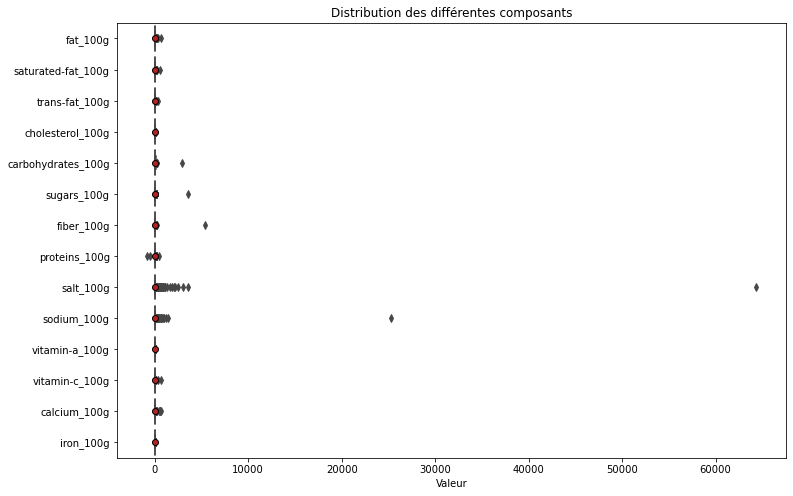

In [136]:
# Distribution des valeurs des proportions des composants
composants = ['fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 
            'cholesterol_100g','carbohydrates_100g','sugars_100g', 
            'fiber_100g','proteins_100g','salt_100g','sodium_100g', 
            'vitamin-a_100g','vitamin-c_100g','calcium_100g','iron_100g']

composants_other = ['energy_100g', 'nutrition-score-fr_100g']
nutri_facts =  composants_other + composants

meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'}

# Distribution des données
plt.figure(figsize=(12, 8)) 
sns.boxplot(data=df_bis[composants],
                orient='h', 
                showmeans=True, 
                meanprops=meanprops)
plt.title("Distribution des différentes composants")
plt.xlabel('Valeur')
plt.show()


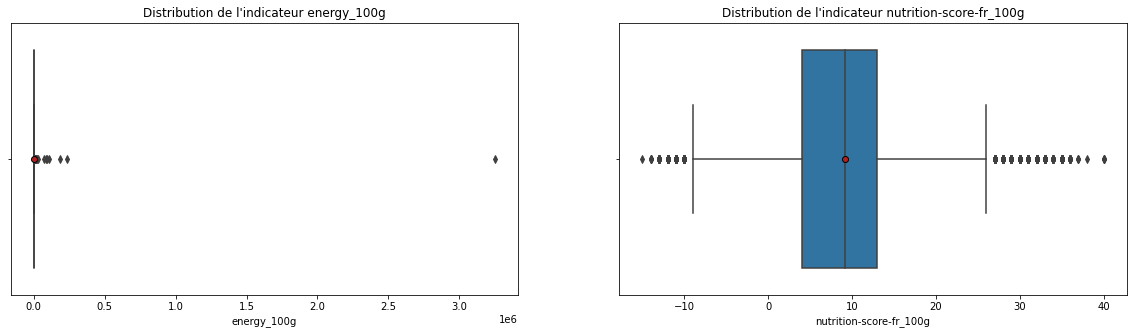

In [137]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
for i, col in enumerate(composants_other):
    sns.boxplot(data=df_bis,
                    x=col,
                    orient='h', 
                    showmeans=True, 
                    meanprops=meanprops,
                    ax = ax[i])
    ax[i].set_title(f"Distribution de l'indicateur {col}")
    ax[i].set_xlabel(col)
plt.show()

In [138]:
def detectOutlier(data, threshold):
 
    outliers = []  # Crée une liste vide pour stocker les outliers
    mean = np.mean(data)  # Calcul de la moyenne des données
    std = np.std(data)  # Calcul de l'écart-type des données
    
    for i in data:
        if std == 0:
            print('Écart-type nul')
            break
        z_score = (i - mean) / std  # Calcul du z-score pour la valeur i
        if np.abs(z_score) > threshold:  # Valeur absolue du z-score
            outliers.append(i)  # Ajoute i à la liste des outliers
            
    return outliers

In [139]:
def print_outlier(df, columns, res_var):
    for col in columns:
        #Application de la fonction à la série subset
        subset = df[col]
        outliers = detectOutlier(subset,2)
        var=res_var+[col]
        res=df.loc[df[col].isin(outliers),var].sort_values(col, ascending=False)
        #affichage des outliers détectés
        print()
        print(f"{col} : Nombre d'outliers détectés => " + str(len(outliers)))
        display(res)

In [140]:
# Liste des variables à inclure dans l'affichage des outliers
res_var=['code',
         'product_name',
         'brands']

# Représentation de la distribution, boxplots, et liste des outliers identifiés avec la méthode du Z-score
print_outlier(df_bis, nutri_facts, res_var)


energy_100g : Nombre d'outliers détectés => 15


,code,product_name,brands,energy_100g
212928,3.257983e+12,Pois cassés,Cora,3251373.0
313506,8.710574e+12,"Nusco, Chocolate Spread, Chocolate",Brinkers,231199.0
249101,3.661405e+12,"Légume Noisettes Carottes, 500 Grammes, Marque...",Iglo,182764.0
112681,2.012030e+11,Premium Extra Virgin Olive Oil,Eliki,110579.0
119184,6.193091e+11,"Sophia, Italian Drink, Squeezed Lime",Sophia Foods Inc.,94140.0
317171,8.854404e+12,NA,NA,87217.0
219302,3.270161e+12,NA,Picard,69292.0
153704,8.213721e+11,Salsa Hot Sauce,Mayan Foods S.A. De C.V.,26861.0
176697,2.000000e+12,bubbly,dairy milk,22000.0
245311,3.596710e+12,mini choux goût fromage de chèvre - poivre,Auchan,18700.0



nutrition-score-fr_100g : Nombre d'outliers détectés => 15815


,code,product_name,brands,nutrition-score-fr_100g
55878,4.300003e+10,Coffee & Milk Creamer,Tassimo,40.0
55851,4.300001e+10,"Maxwell House, Creme Cappuccino",Tassimo,40.0
55852,4.300001e+10,Cafe Collection Coffee & Milk Creamer,Tassimo,40.0
177065,2.000937e+07,Cappuccino allégé en sucre*,Bellarom,40.0
55961,4.300005e+10,"Tim Hortons, Cafe & Bake Shop Latte",Tassimo,38.0
...,...,...,...,...
311235,8.480001e+12,Edamame,Sin marca,-14.0
279242,5.411788e+12,Edamamé Beans Nature,Lima,-14.0
210784,3.256224e+12,Lentilles corail bio,"U Bio,U",-14.0
199759,3.222471e+12,Choux-fleurs en fleurettes,Casino,-14.0



fat_100g : Nombre d'outliers détectés => 13460


,code,product_name,brands,fat_100g
112681,2.012030e+11,Premium Extra Virgin Olive Oil,Eliki,714.29
245311,3.596710e+12,mini choux goût fromage de chèvre - poivre,Auchan,380.00
305054,8.032943e+12,Graine de couscous moyen,La méditerranéa,105.00
303101,8.005306e+12,Ekstra Jomfru Olivenolie,Santagata,101.00
223340,3.291960e+12,Colza & Olive,Emile Noël,100.00
...,...,...,...,...
231960,3.421372e+12,Friture Chocolat Noir 72% de Cacao,Les Chevaliers d'Argouges,43.40
252613,3.760077e+12,Pure Origine 70% cacao,Saveurs & Nature,43.40
311302,8.480001e+12,Filetes de Sardina marinada,Hacendado,43.40
9885,1.170100e+10,"Luxury Brazils Nuts, Dark Chocolate",Beech's Fine Chocolates,43.40



saturated-fat_100g : Nombre d'outliers détectés => 13873


,code,product_name,brands,saturated-fat_100g
313506,8.710574e+12,"Nusco, Chocolate Spread, Chocolate",Brinkers,550.00
245311,3.596710e+12,mini choux goût fromage de chèvre - poivre,Auchan,210.00
119389,6.268531e+11,"Raw 100% Cacao, With Bits Of Delicate Dates",Antidote,175.38
275205,5.158418e+12,Végétaline (offre familiale),Végétaline,100.00
177219,2.002208e+07,Frites & Fritures,Vita d'Or,100.00
...,...,...,...,...
260632,4.016993e+12,Emmentaler,Aggenstein,18.70
265715,4.312468e+12,Emmentaler 45% Fett i. Tr.,Ein Herz für Erzeuger,18.70
265841,4.316268e+12,Emmentaler,Gutes Land,18.70
216632,3.263859e+12,"Caussac (26,3% MG)",Leader Price,18.70



trans-fat_100g : Nombre d'outliers détectés => 1174


,code,product_name,brands,trans-fat_100g
11941,1.532900e+10,12 Round Roasted Pepper And Smoked Mozzarella ...,La Gustosa Food Products & Imports Co. Inc.,369.00
138451,7.389120e+11,Country Fried Beef Steak,"Boston Market, Bellisio Foods",173.26
81627,7.272802e+10,Roman Beans,La Cena,130.00
81625,7.272802e+10,Pinto Beans,Lacena,130.00
120930,6.395220e+11,"Gourmet Ice Cream, Maple Nut",Lopez Island Creamery,110.00
...,...,...,...,...
57025,4.427603e+10,Dessert,Lakeview Farms,2.16
121599,6.483710e+11,Biscuit Sandwich,Maple View Farms,2.16
85539,7.386657e+10,"Asiago Quiche, Asparagus, Mushroom","Kings, Kings Super Markets Inc",2.14
23576,2.819001e+10,"Xtra Butter Microwave Pop Corn, Butter",Jolly Time,-3.03



cholesterol_100g : Nombre d'outliers détectés => 42


,code,product_name,brands,cholesterol_100g
137796,7.365470e+11,Sliced Havarti Jalapeno,Roth,95.238
284888,7.181331e+11,"Organic Chocolate Ice Cream, Bittersweet Choco...",Three Twins Ice Cream,70.588
58007,4.610001e+10,String Cheese Snacks,Sargento,62.500
15172,1.940802e+10,Refried Beans,Tio Franco,13.846
279394,5.412038e+12,Praliné Lait,Galler,10.900
268514,4.897010e+12,Dried Squid,Lion & Globe T.M,1.580
115983,4.814302e+11,Colorado Omelet,Backpacker's Pantry,1.291
123283,6.701711e+11,"Kernel Season's, Cheesy Caramel Corn Seasoning",Kernel Season's Llc,1.250
123257,6.695560e+11,Ginger Teriyaki Simmer Sauce,Hissho,1.081
68218,6.869712e+10,"Kui Fat, Salted Mustard",Fat Food Co.,0.996



carbohydrates_100g : Nombre d'outliers détectés => 10544


,code,product_name,brands,carbohydrates_100g
155803,8.402281e+11,"Tamarind Juice With Nata De Coco, Tamarind",Kelly Jelly,2916.67
71000,7.055280e+10,"Toaster Pastries, Strawberry",Winco Foods,209.38
245311,3.596710e+12,mini choux goût fromage de chèvre - poivre,Auchan,190.00
155609,8.386190e+11,Beurre d'érable,NA,164.00
317635,8.935001e+12,Banane sèche,Vinawang,139.00
...,...,...,...,...
162060,8.544170e+11,"Pure Fruit Bites, Banana",Buddy Fruits,83.93
164705,8.569160e+11,"Sunkist, Freeze Dried Fruit Crunchy Strawberri...",Sunkist Growers Inc.,83.93
116245,4.930259e+06,Atomic,Carambar,83.90
247381,3.596710e+12,Pâtes de fruits d'Auvergne,Vendome,83.90



sugars_100g : Nombre d'outliers détectés => 17869


,code,product_name,brands,sugars_100g
313506,8.710574e+12,"Nusco, Chocolate Spread, Chocolate",Brinkers,3520.00
155803,8.402281e+11,"Tamarind Juice With Nata De Coco, Tamarind",Kelly Jelly,166.67
111566,1.364008e+06,Tomato Ketchup,Heinz,134.00
133567,7.201182e+11,Mango Jalapeno,California Flavored Nuts,110.71
239347,3.560071e+12,Sirop d'agave,Carrefour Bio,105.00
...,...,...,...,...
206680,3.250391e+12,Ivoria Lait Praliné,Ivoria,55.10
265765,4.316268e+12,Weiße Schokolade,Goutier,55.10
266245,4.388840e+12,Weisse Schokolade,ja!,55.10
268833,4.902555e+12,"Look Royal, Chocolate, Strawberry",Fujiya,55.10



fiber_100g : Nombre d'outliers détectés => 1646


,code,product_name,brands,fiber_100g
313506,8.710574e+12,"Nusco, Chocolate Spread, Chocolate",Brinkers,5380.0
155803,8.402281e+11,"Tamarind Juice With Nata De Coco, Tamarind",Kelly Jelly,250.0
298897,7.622211e+12,Milka Schmunzelhase Alpenmilch 175G,Mondelez,178.0
64352,5.228700e+10,"Chef Merito, Creole Style Adobo",Chef Merito Inc.,166.7
157446,8.501960e+11,Powdered Sweetener Packets,Pyure,100.0
...,...,...,...,...
179430,2.036121e+07,Queijo Flamengo,"Terra do Vento,INSULAC",23.3
221770,3.276650e+12,1KG Lentille Verte Samia,Samia,23.3
221771,3.276650e+12,Lentilles Blondes,"Samia,Haudecoœur",23.3
15363,1.964600e+10,Wasabi Peas,"Harmons, Harmons Inc",23.3



proteins_100g : Nombre d'outliers détectés => 15427


,code,product_name,brands,proteins_100g
313506,8.710574e+12,"Nusco, Chocolate Spread, Chocolate",Brinkers,430.00
170118,8.839291e+11,Harry Potter & The Deathly Hallows Radcliffe /...,Harry's,100.00
71066,7.055290e+10,Unflavored Gelatin,Winco Foods,100.00
168831,8.721976e+11,Sprinkles,Iq Accessories,100.00
283105,6.091035e+12,Eau,Vital,100.00
...,...,...,...,...
7151,1.116116e+10,Great Northern Beans,"Shurfine, Topco Associates Inc.",22.22
7152,1.116116e+10,Great Northern Beans,"Shurfine, Topco Associates Inc.",22.22
80212,7.236817e+10,Salad Topping,Delallo,22.22
115310,4.029816e+06,"Gourmet Blends, Seasoning, Garlic Pepper",Spice Islands,-500.00



salt_100g : Nombre d'outliers détectés => 36


,code,product_name,brands,salt_100g
145844,7.867544e+11,Prickly Syrup,K. Benson Company,64312.80000
135064,7.241950e+11,Chiles Habaneros Rojos,Marin,3556.00000
139595,7.437243e+11,Sauce & Marinade,Got Jerk!,3048.00000
105006,8.649291e+10,Bastoncini Whole Wheat,Clemente Bakery,2452.41318
51348,4.150076e+10,"Crispy Fried Onions, White Cheddar",French's,2177.14322
23590,2.823922e+10,Original Barbecue Sauce,Billy Sims Barbecue,2032.00000
58007,4.610001e+10,String Cheese Snacks,Sargento,1799.16582
160684,8.532050e+11,"Sausage Patties, Veggie Sausage Patties",Heritage Health Food,1669.14322
94631,7.789036e+10,Swiss Recipe Smoked Almonds & Sea Salt In Dark...,Wegmans,1318.38192
106330,8.939710e+10,"Small Potato Dumplings, Potato Gnocchetti",Racconto,1139.15190



sodium_100g : Nombre d'outliers détectés => 36


,code,product_name,brands,sodium_100g
145844,7.867544e+11,Prickly Syrup,K. Benson Company,25320.000000
135064,7.241950e+11,Chiles Habaneros Rojos,Marin,1400.000000
139595,7.437243e+11,Sauce & Marinade,Got Jerk!,1200.000000
105006,8.649291e+10,Bastoncini Whole Wheat,Clemente Bakery,965.517000
51348,4.150076e+10,"Crispy Fried Onions, White Cheddar",French's,857.143000
23590,2.823922e+10,Original Barbecue Sauce,Billy Sims Barbecue,800.000000
58007,4.610001e+10,String Cheese Snacks,Sargento,708.333000
160684,8.532050e+11,"Sausage Patties, Veggie Sausage Patties",Heritage Health Food,657.143000
94631,7.789036e+10,Swiss Recipe Smoked Almonds & Sea Salt In Dark...,Wegmans,519.048000
106330,8.939710e+10,"Small Potato Dumplings, Potato Gnocchetti",Racconto,448.485000



vitamin-a_100g : Nombre d'outliers détectés => 4


,code,product_name,brands,vitamin-a_100g
66110,5.574259e+10,Medium Cheddar,Compliments,26.70
320509,9.504000e+12,DAFANI Cocktail Mangue Ananas Fruit de la passion,DAFANI,5.00
314556,8.712566e+12,Blue Band Goede Start,Blue Band,0.80
238159,3.560070e+12,"Multifruits, boisson",Produits Blancs,0.12



vitamin-c_100g : Nombre d'outliers détectés => 69


,code,product_name,brands,vitamin-c_100g
149718,8.116600e+11,Natural Electrolyte Enhanced Drink Tabs,Nuun,716.9811
139242,7.423650e+11,"Organic Fruit Snacks, Berry Medley",Horizon,370.3704
132323,7.165190e+11,Broccoli Wokly,Mann's,152.9412
195747,3.160922e+12,Juvamine Vitamine C500 à croquer sans sucres,Juvamine,100.0000
175902,2.000000e+12,Vitamin C+Zink,Additiva,63.2000
...,...,...,...,...
94254,7.782612e+10,Hot Tea,Sportea,3.0000
72363,7.073407e+10,Antioxidant Green Tea,Celestial Seasonings,3.0000
261524,4.028864e+12,CitroBiotic,"Source Claire,CitroBiotic",3.0000
66387,5.835421e+10,Orange Drink Mix,Thirst Quench'R,3.0000



calcium_100g : Nombre d'outliers détectés => 57


,code,product_name,brands,calcium_100g
131674,7.137338e+11,Colby Jack Cheese,Meijer,694.737
124143,6.811688e+11,"Tastyshake, Thermodynamic Protein Complex Prot...",Body Lab,613.636
10494,1.251160e+10,"Sweeteners, Organic Molasses","Wholesome, Wholesome Sweeteners",522.727
165426,8.577660e+11,Spreadable Gouda Cheese With Red Pepper,Eru,432.143
112298,1.855441e+11,"Dulce De Leche, Milk Caramel Spread",Gaucho Ranch,285.714
123679,6.781081e+11,Sweet Rice,Jayone,173.333
124222,6.835330e+11,Turkish Sun Dried Figs,Lerida,161.560
117077,6.044850e+11,"Promenade Red Apple Market, B.B.Q Seasoning",Nutmeg Spice Company,136.000
113049,2.077983e+11,"5 Year, Gouda Cheese","Vintage, Vintage 5 Year",125.000
285611,7.441041e+12,"Jaleas Ujarra's, Jelly, Strawberry",Productos Ujarras S.A.,120.000



iron_100g : Nombre d'outliers détectés => 29


,code,product_name,brands,iron_100g
138144,7.374840e+11,Palm Sugar,First World Brand,50.00000
90396,7.581002e+10,Gluten Free Soy Sauce,San-J International Inc.,47.05882
317615,8.934572e+12,Nems apéritifs aux crevettes & à l'ail,Croq' N' Crak,25.00000
14313,1.862774e+10,Go Lean Cereals,Kashi,19.20000
23570,2.819001e+10,Unpopped Popcorn,Smart Balance,12.12121
86418,7.433338e+10,Natural Sweetened Shredded Wheat Bite Size Cereal,Arrowhead Mills,11.53846
117077,6.044850e+11,"Promenade Red Apple Market, B.B.Q Seasoning",Nutmeg Spice Company,9.00000
34604,3.760009e+10,"Sutton & Dodge, Stew Meat Choice Angus Beef","Hormel, Hormel Foods Llc.",8.92857
307985,8.412427e+12,Harina de garbanzo,Las Panaeras Sevillanas,7.20000
171062,8.872840e+11,"Carey, Medium Salsa Mexicana Verde",Productos Carey S.A.,6.66667


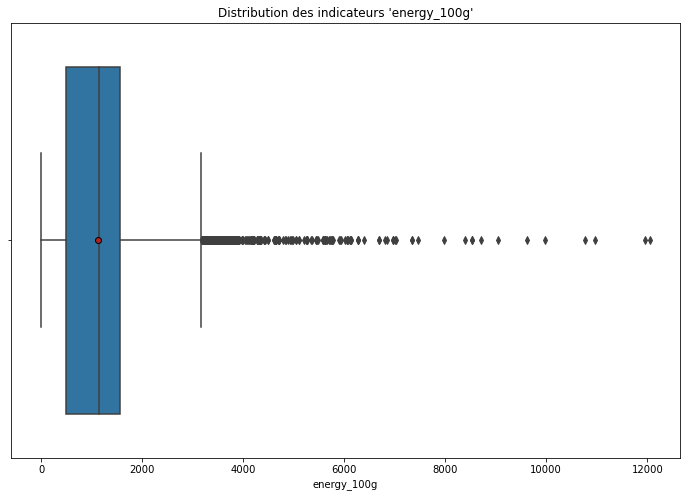

In [141]:
# Liste des outliers 
energy_outlier = detectOutlier(df_bis['energy_100g'], 2)

# Afficher les nouveaux outliers



sns.boxplot(data=df_bis[~df_bis['energy_100g'].isin(energy_outlier)],
                x='energy_100g',
                orient='h', 
                showmeans=True, 
                meanprops=meanprops)
plt.title("Distribution des indicateurs 'energy_100g'")
plt.xlabel('energy_100g')
plt.show()


Lignes avec anomalies détectées pour energy_100g par Z-score:
                code                                                url  \
112681  2.012030e+11  http://world-fr.openfoodfacts.org/produit/0201...   
119184  6.193091e+11  http://world-fr.openfoodfacts.org/produit/0619...   
153704  8.213721e+11  http://world-fr.openfoodfacts.org/produit/0821...   
176697  2.000000e+12  http://world-fr.openfoodfacts.org/produit/2000...   
212928  3.257983e+12  http://world-fr.openfoodfacts.org/produit/3257...   
219302  3.270161e+12  http://world-fr.openfoodfacts.org/produit/3270...   
245311  3.596710e+12  http://world-fr.openfoodfacts.org/produit/3596...   
249101  3.661405e+12  http://world-fr.openfoodfacts.org/produit/3661...   
313506  8.710574e+12  http://world-fr.openfoodfacts.org/produit/8710...   
317171  8.854404e+12  http://world-fr.openfoodfacts.org/produit/8854...   

                           creator                      created_t  \
112681             usda-ndb-import  1970-0

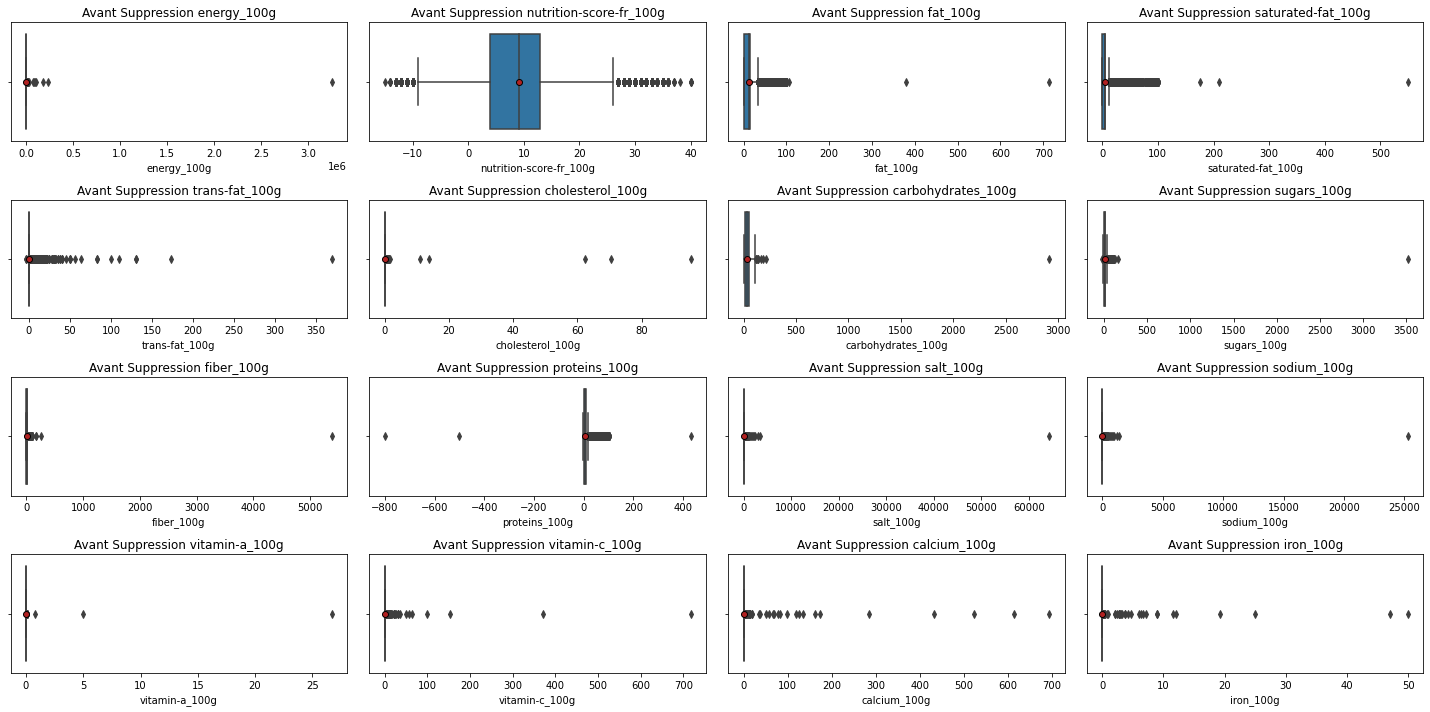

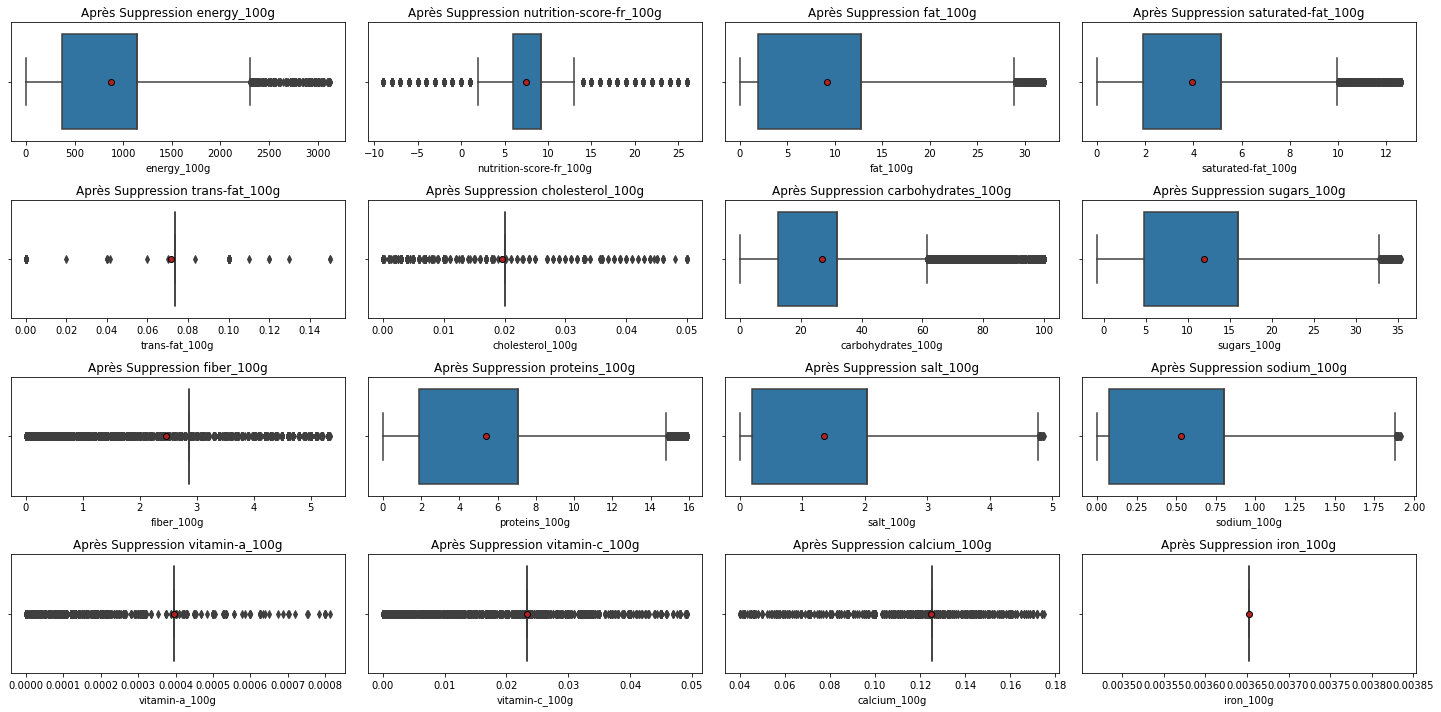

In [142]:
# Détection et Traitement des Outliers

# Calculer les IQR et détecter les outliers pour une colonne d'exemple 'age'
def detect_outliers_iqr(df_bis, column):
    Q1 = df_bis[column].quantile(0.25)
    Q3 = df_bis[column].quantile(0.75)
    IQR = Q3 - Q1
    return df_bis[~((df_bis[column] < (Q1 - 1.5 * IQR)) | (df_bis[column] > (Q3 + 1.5 * IQR)))]


# Apply outlier detection using IQR for all columns in nutri_facts
df_outliers = df_bis.copy()  # Copy the DataFrame
for col in nutri_facts:
    df_outliers = detect_outliers_iqr(df_outliers, col)

# Calcul des Z-scores et détection des anomalies
for col in nutri_facts:
    df_bis[f'Z_score_{col}'] = stats.zscore(df_bis[col])
    df_bis[f'Anomaly_{col}'] = df_bis[f'Z_score_{col}'].abs() > 3

# Afficher les lignes avec anomalies détectées par Z-score pour chaque colonne
for col in nutri_facts:
    print(f"\nLignes avec anomalies détectées pour {col} par Z-score:")
    print(df_bis[df_bis[f'Anomaly_{col}']])

# Visualisation des Boxplots

# Boxplot avant suppression des valeurs aberrantes
fig, ax = plt.subplots(4, 4, figsize = (20, 10))
for i, col in enumerate(nutri_facts):
    sns.boxplot(data=df_bis,
                    x=col,
                    orient='h', 
                    showmeans=True, 
                    meanprops=meanprops,
                    ax=ax[i // 4, i % 4])  # To place the plots in a 4x4 grid
    ax[i // 4, i % 4].set_title(f"Avant Suppression {col}")
    ax[i // 4, i % 4].set_xlabel(col)

plt.tight_layout()
plt.show()

# Boxplot pour la colonne 'age' après suppression des valeurs aberrantes
fig, ax = plt.subplots(4, 4, figsize = (20, 10))
for i, col in enumerate(nutri_facts):
    sns.boxplot(data=df_outliers,
                    x=col,
                    orient='h', 
                    showmeans=True, 
                    meanprops=meanprops,
                    ax=ax[i // 4, i % 4])
    ax[i // 4, i % 4].set_title(f"Après Suppression {col}")
    ax[i // 4, i % 4].set_xlabel(col)

plt.tight_layout()
plt.show()




In [144]:

print("\nRésumé des données après nettoyage et détection des anomalies :")
print(f"Nombre de lignes initiales: {len(df)}")
print(f"Nombre de lignes après suppression et imputation des valeurs manquantes: {len(df_bis)}")
print(f"Nombre de lignes après suppression des outliers: {len(df_outliers)}")


Résumé des données après nettoyage et détection des anomalies :
Nombre de lignes initiales: 320772
Nombre de lignes après suppression et imputation des valeurs manquantes: 320746
Nombre de lignes après suppression des outliers: 125706


In [146]:
df_outliers.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,countries_fr,...,Anomaly_sodium_100g,Z_score_vitamin-a_100g,Anomaly_vitamin-a_100g,Z_score_vitamin-c_100g,Anomaly_vitamin-c_100g,Z_score_calcium_100g,Anomaly_calcium_100g,Z_score_iron_100g,Anomaly_iron_100g,Anomaly
0,3087.0,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1970-01-01 00:00:01.474103866,2016-09-17 09:17:46+00:00,1970-01-01 00:00:01.474103893,2016-09-17 09:18:13+00:00,Farine de blé noir,Ferme t'y R'nao,France,...,False,5.659617e-16,False,2.270650e-16,False,-5.070620e-15,False,-1.060624e-15,False,False
6,16117.0,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1970-01-01 00:00:01.489055730,2017-03-09 10:35:30+00:00,1970-01-01 00:00:01.489055730,2017-03-09 10:35:30+00:00,Organic Long Grain White Rice,Lundberg,États-Unis,...,False,5.659617e-16,False,-1.394449e-02,False,-3.688440e-02,False,-1.060624e-15,False,False
18,18197.0,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1970-01-01 00:00:01.489055652,2017-03-09 10:34:12+00:00,1970-01-01 00:00:01.489055652,2017-03-09 10:34:12+00:00,Lotus Organic Brown Jasmine Rice,Unfi,États-Unis,...,False,5.659617e-16,False,2.270650e-16,False,-5.070620e-15,False,-1.060624e-15,False,False
46,24600.0,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,1970-01-01 00:00:01.434530704,2015-06-17 08:45:04+00:00,1970-01-01 00:00:01.434535914,2015-06-17 10:11:54+00:00,Filet de bœuf,NA,France,...,False,5.659617e-16,False,2.270650e-16,False,-5.070620e-15,False,-1.060624e-15,False,False
47,27083.0,http://world-fr.openfoodfacts.org/produit/0000...,canieatthis-app,1970-01-01 00:00:01.472223782,2016-08-26 15:03:02+00:00,1970-01-01 00:00:01.472223782,2016-08-26 15:03:02+00:00,Marks % Spencer 2 Blueberry Muffins,NA,Royaume-Uni,...,False,5.659617e-16,False,2.270650e-16,False,-5.070620e-15,False,-1.060624e-15,False,False


6. ANALYSE UNIVRARIEE ET BIVARIEE

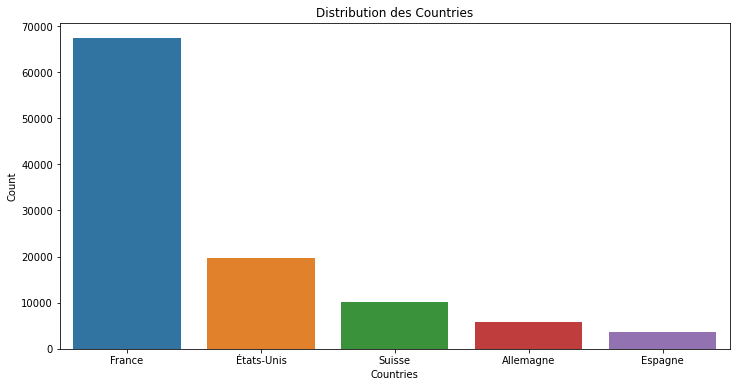

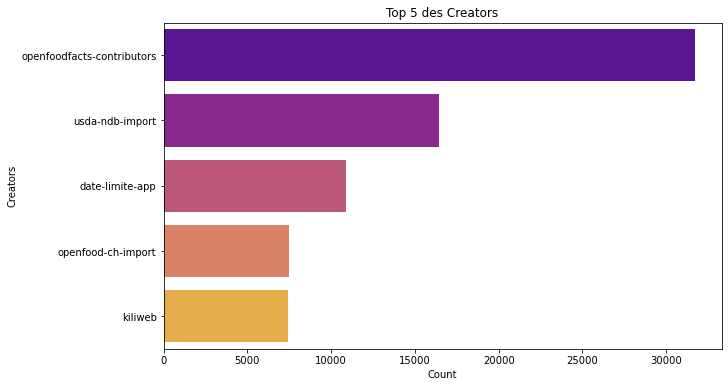

In [181]:
# Top 5 des countries
plt.figure(figsize=(12, 6))
sns.countplot(data=df_outliers, x='countries_fr', order=df_outliers['countries_fr'].value_counts().head(5).index)
plt.title('Distribution des Countries')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()


#Top 5 des creators
top_creators = df_outliers['creator'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_creators.index, x=top_creators.values, palette='plasma')
plt.title('Top 5 des Creators')
plt.xlabel('Count')
plt.ylabel('Creators')
plt.show()


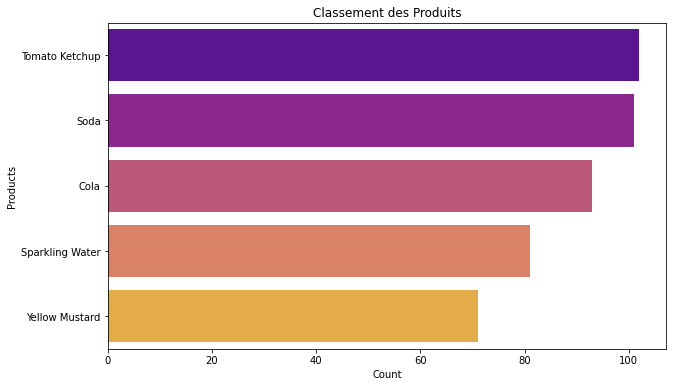

In [192]:
# Classement des produits les plus fréquents
df_cleaned = df_outliers[df_outliers['product_name'] != 'NA']
top_products= df_cleaned['product_name'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_products.index, x=top_products.values, palette='plasma')
plt.title('Classement des Produits')
plt.xlabel('Count')
plt.ylabel('Products')
plt.show()

In [169]:
df_outliers[nutri_facts].describe()

,energy_100g,nutrition-score-fr_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
count,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,125706.000000,1.257060e+05
mean,869.788013,7.527779,9.181897,3.958014,0.071516,0.019625,26.853832,11.980354,2.463626,5.374382,1.347432,0.530760,0.000395,0.023245,0.125038,3.652494e-03
std,504.154378,4.856111,6.305609,2.342021,0.011876,0.003023,16.925267,7.060427,0.986208,3.477823,0.924698,0.364035,0.000025,0.002034,0.003148,4.385832e-15
min,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,3.652494e-03
25%,368.000000,6.000000,1.900000,1.900000,0.073476,0.020071,12.500000,4.800000,2.862119,1.900000,0.187960,0.074803,0.000397,0.023367,0.125163,3.652494e-03
50%,1141.913310,9.165518,12.730422,5.129952,0.073476,0.020071,32.073793,16.003304,2.862119,7.076378,2.028632,0.798818,0.000397,0.023367,0.125163,3.652494e-03
75%,1141.913310,9.165518,12.730422,5.129952,0.073476,0.020071,32.073793,16.003304,2.862119,7.076378,2.028632,0.798818,0.000397,0.023367,0.125163,3.652494e-03
max,3125.000000,26.000000,32.000000,12.600000,0.150000,0.050000,100.000000,35.380000,5.340000,15.900000,4.871720,1.918000,0.000812,0.049200,0.175000,3.652494e-03


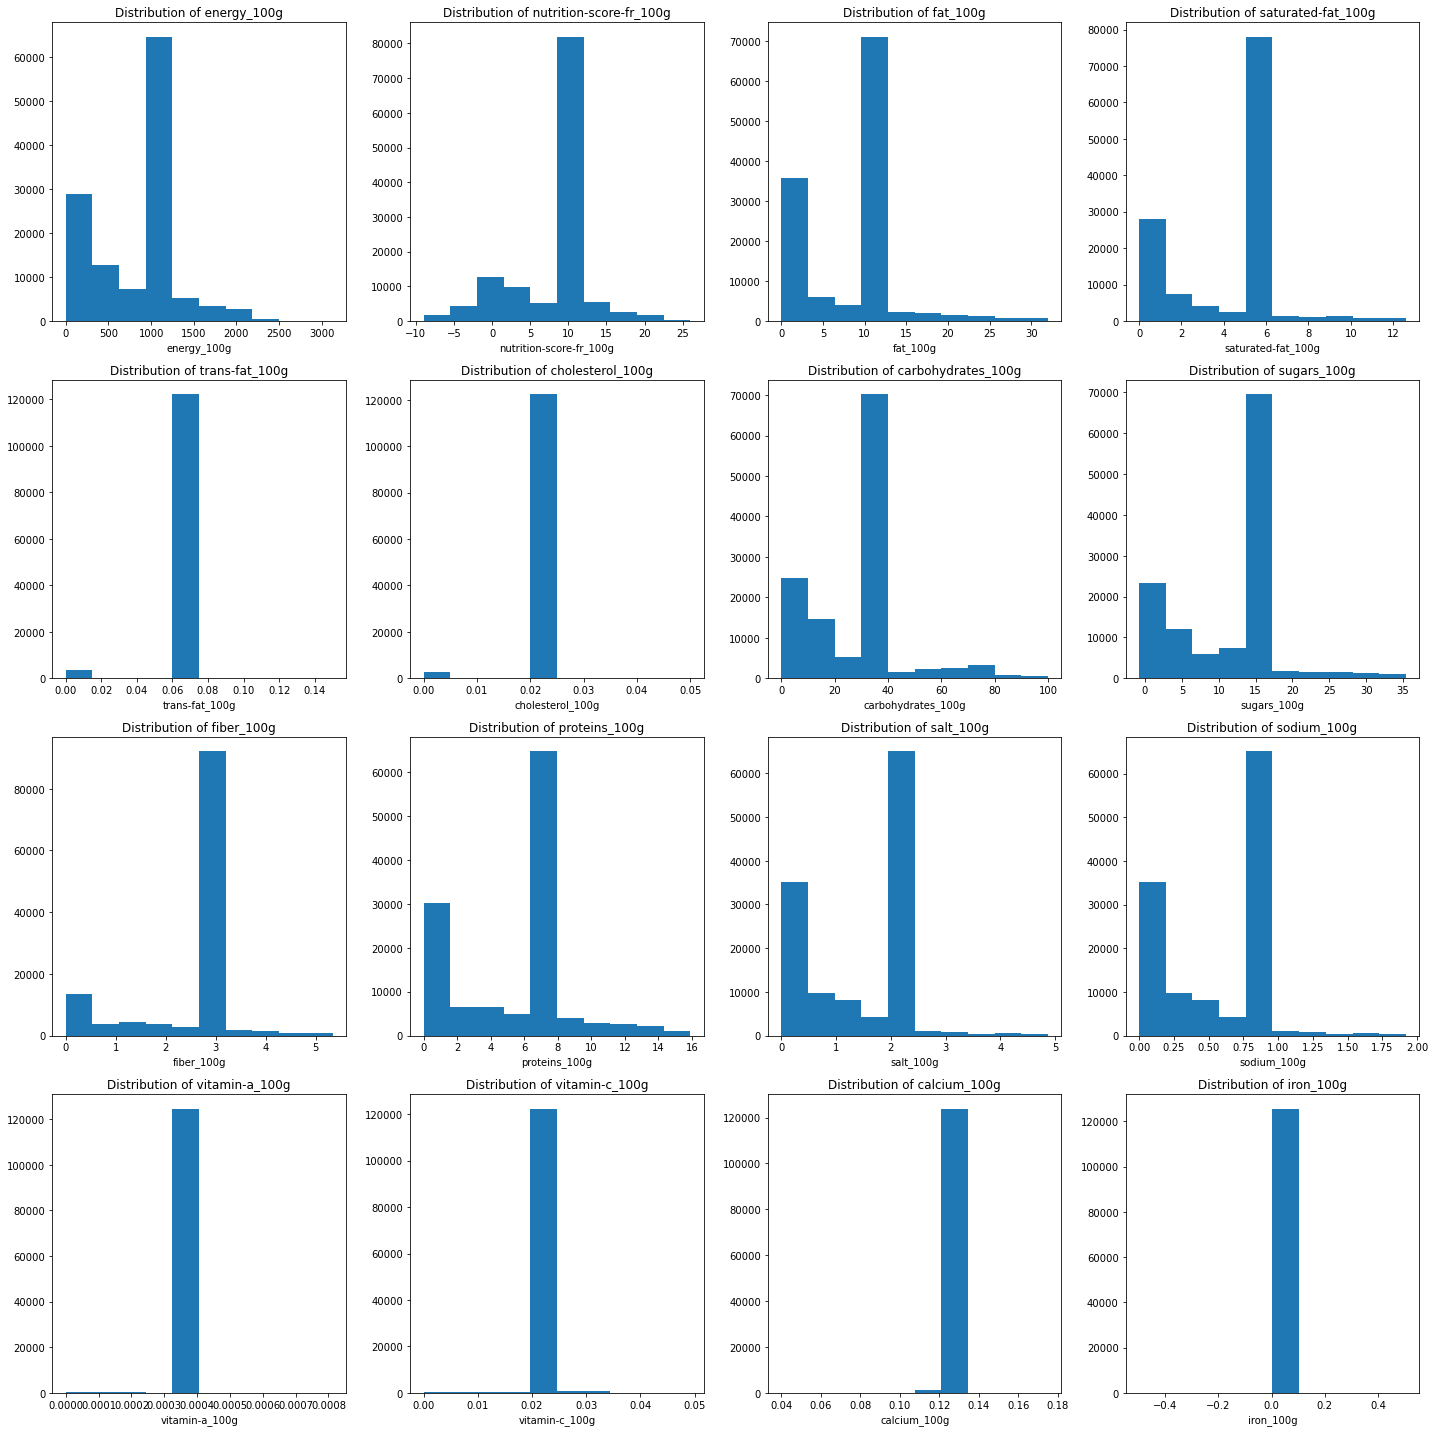

In [174]:
# Histogramme 
fig, ax = plt.subplots(4, 4, figsize=(20, 20))


for i, col in enumerate(nutri_facts):
    ax[i // 4, i % 4].hist(df_outliers[col], bins=10)  
    ax[i // 4, i % 4].set_title(f"Distribution of {col}")
    ax[i // 4, i % 4].set_xlabel(col)


plt.tight_layout()
plt.show()



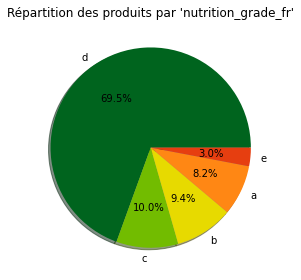

In [180]:
# Distribution des produits par nutrigrade
nutri_counts = df_outliers['nutrition_grade_fr'].value_counts()

fig, ax = plt.subplots()

ax.pie(x=nutri_counts,                                   
         colors = ['#00641E', '#72BC00', '#E7DA00', '#FF8714', '#E63E10', 'grey'],
         labels = nutri_counts.index,
         autopct='%.1f%%', 
         shadow = True)
ax.set_title("Répartition des produits par 'nutrition_grade_fr'")

plt.tight_layout()
plt.show()

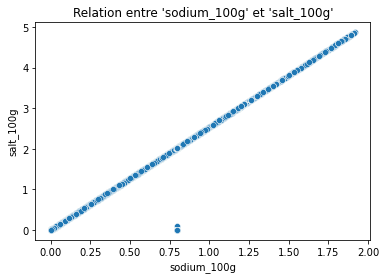

In [197]:
# Relation soudium_100g et salt_100g
sns.scatterplot(
    data = df_outliers, 
    x = 'sodium_100g',
    y = 'salt_100g')
plt.title("Relation entre 'sodium_100g' et 'salt_100g'")
plt.show()

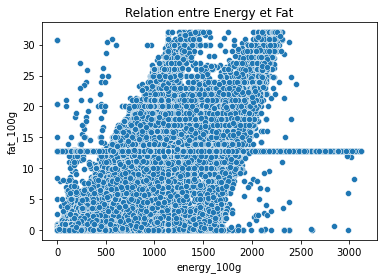

In [198]:
# Relation energy_100g et fat_100g
sns.scatterplot(
    data = df_outliers, 
    x = 'energy_100g',
    y = 'fat_100g')
plt.title("Relation entre Energy et Fat")
plt.show()

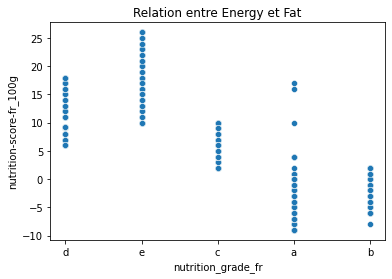

In [199]:
# Relation entre nutrition_grade_fr et nutrition-score-fr_100g
sns.scatterplot(
    data = df_outliers, 
    x = 'nutrition_grade_fr',
    y = 'nutrition-score-fr_100g')
plt.title("Relation entre Energy et Fat")
plt.show()

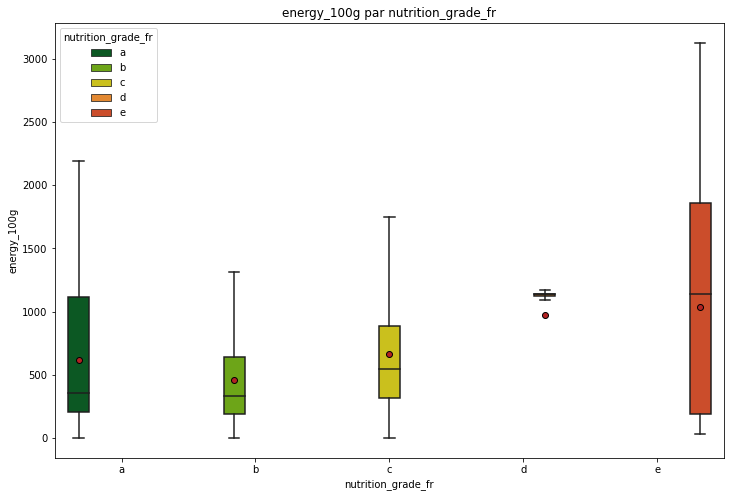

In [202]:
# Relation entre nutrition_grade_fr et energy_100g
plt.figure(figsize=(12, 8)) 
sns.boxplot(data=df_outliers.sort_values('nutrition_grade_fr'), 
            x='nutrition_grade_fr', 
            y='energy_100g', 
            hue='nutrition_grade_fr',
            palette = ['#00641E', '#72BC00', '#E7DA00', '#FF8714', '#E63E10'],
            showfliers=False, 
            showmeans=True, 
            meanprops=meanprops)

plt.title("energy_100g par nutrition_grade_fr")
plt.show()

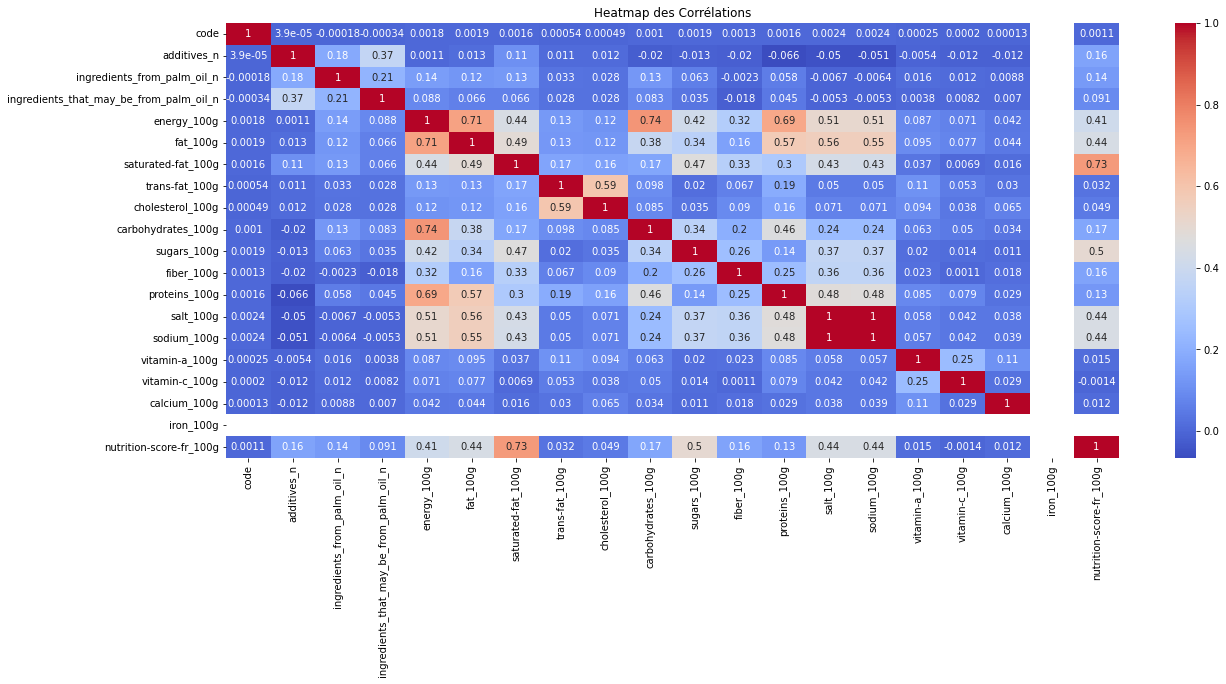

In [184]:
#Visualiser la matrice de corrélation
corr1 = df_outliers.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(corr1, annot=True, cmap='coolwarm')
plt.title('Heatmap des Corrélations')
plt.show()

7. ANALYSE MULTIVARIEE: PCA

In [335]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Séparer les colonnes numériques et catégorielles
numerical_features = ['fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 
            'cholesterol_100g','carbohydrates_100g','sugars_100g', 
            'fiber_100g','proteins_100g','salt_100g','sodium_100g', 
            'vitamin-a_100g','vitamin-c_100g','calcium_100g','iron_100g',
            'energy_100g','nutrition-score-fr_100g']
categorical_features = ['product_name', 'nutrition_grade_fr']

# Create a new DataFrame with only the selected columns
df_cleaned = df_outliers[numerical_features + categorical_features]

# Pipelines pour prétraiter les colonnes numériques et catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())  # Standardisation des données numériques
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Encodage One-Hot pour les données catégorielles
        ]), categorical_features)
    ])

# Prétraiter les données
X_processed = preprocessor.fit_transform(df_cleaned)

In [336]:
df_cleaned.columns

Index(['fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'energy_100g', 'nutrition-score-fr_100g',
       'product_name', 'nutrition_grade_fr'],
      dtype='object')

In [337]:
# Séparer les colonnes numériques et catégorielles
numerical_features = ['fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 
            'cholesterol_100g','carbohydrates_100g','sugars_100g', 
            'fiber_100g','proteins_100g','salt_100g','sodium_100g', 
            'vitamin-a_100g','vitamin-c_100g','calcium_100g','iron_100g',
            'energy_100g','nutrition-score-fr_100g']
categorical_features = ['nutrition_grade_fr']

# Normalisation et Standardisation
scaler = StandardScaler()
df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])

df_cleaned.head()

C:\Users\SOTA tangy-laurelle\AppData\Local\Temp\ipykernel_97716\2960335178.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])


,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,energy_100g,nutrition-score-fr_100g,product_name,nutrition_grade_fr
0,0.562759,0.500398,0.165033,0.147662,0.308413,0.569791,0.404067,0.489387,0.736676,0.736356,0.076144,0.060254,0.039744,1.301043e-18,0.539768,0.337254,Farine de blé noir,d
6,0.562759,0.500398,0.165033,0.147662,3.140061,0.569791,0.404067,1.010872,0.736676,0.736356,0.076144,-10.098963,-25.742987,1.301043e-18,1.230207,0.337254,Organic Long Grain White Rice,d
18,-1.104084,0.500398,0.165033,0.147662,3.008896,-1.382408,-0.267314,1.010872,0.736676,0.736356,0.076144,0.060254,0.039744,1.301043e-18,1.412692,0.337254,Lotus Organic Brown Jasmine Rice,d
46,0.562759,0.500398,0.165033,0.147662,0.308413,0.569791,0.404067,0.489387,0.736676,0.736356,0.076144,0.060254,0.039744,1.301043e-18,0.539768,0.337254,Filet de bœuf,d
47,0.562759,0.500398,0.165033,0.147662,0.308413,0.569791,0.404067,0.489387,0.736676,0.736356,0.076144,0.060254,0.039744,1.301043e-18,1.275829,0.337254,Marks % Spencer 2 Blueberry Muffins,d


In [338]:
df_cleaned.isnull().sum()

fat_100g                   0
saturated-fat_100g         0
trans-fat_100g             0
cholesterol_100g           0
carbohydrates_100g         0
sugars_100g                0
fiber_100g                 0
proteins_100g              0
salt_100g                  0
sodium_100g                0
vitamin-a_100g             0
vitamin-c_100g             0
calcium_100g               0
iron_100g                  0
energy_100g                0
nutrition-score-fr_100g    0
product_name               0
nutrition_grade_fr         0
dtype: int64

In [339]:
print(df_cleaned[categorical_features].isna().sum())

nutrition_grade_fr    0
dtype: int64


In [340]:
# Encodage One-Hot des variables catégorielles
#df_cleaned = df_cleaned.dropna(subset=categorical_features)

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_columns = encoder.fit_transform(df_cleaned[categorical_features])

# Conversion du résultat d'encodage en DataFrame
df_encodedd = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_features))

In [341]:
df_encodedd.head()

,nutrition_grade_fr_a,nutrition_grade_fr_b,nutrition_grade_fr_c,nutrition_grade_fr_d,nutrition_grade_fr_e
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [342]:
# Vérifier que la sortie de OneHotEncoder est dense
print(f"Type of encoded_columns: {type(encoded_columns)}")


Type of encoded_columns: <class 'numpy.ndarray'>


In [343]:
# Imputation des NaN dans les colonnes numériques
df_cleaned[numerical_features] = df_cleaned[numerical_features].fillna(df_cleaned[numerical_features].mean())

# Imputation des NaN dans les colonnes catégorielles
df_encodedd = df_encodedd.fillna(df_encodedd.mean())


C:\Users\SOTA tangy-laurelle\AppData\Local\Temp\ipykernel_97716\3525236174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numerical_features] = df_cleaned[numerical_features].fillna(df_cleaned[numerical_features].mean())


In [344]:
# Vérifiez qu'il ne reste aucun NaN
print(df_cleaned[numerical_features].isna().sum())  # S'assurer qu'il n'y a plus de NaN

fat_100g                   0
saturated-fat_100g         0
trans-fat_100g             0
cholesterol_100g           0
carbohydrates_100g         0
sugars_100g                0
fiber_100g                 0
proteins_100g              0
salt_100g                  0
sodium_100g                0
vitamin-a_100g             0
vitamin-c_100g             0
calcium_100g               0
iron_100g                  0
energy_100g                0
nutrition-score-fr_100g    0
dtype: int64


In [345]:
# Vérifiez qu'il ne reste aucun NaN
print(df_encodedd.isna().sum()) 

nutrition_grade_fr_a    0
nutrition_grade_fr_b    0
nutrition_grade_fr_c    0
nutrition_grade_fr_d    0
nutrition_grade_fr_e    0
dtype: int64


In [346]:
df_encodedd.dtypes

nutrition_grade_fr_a    float64
nutrition_grade_fr_b    float64
nutrition_grade_fr_c    float64
nutrition_grade_fr_d    float64
nutrition_grade_fr_e    float64
dtype: object

In [347]:
df_cleaned[numerical_features].dtypes

fat_100g                   float64
saturated-fat_100g         float64
trans-fat_100g             float64
cholesterol_100g           float64
carbohydrates_100g         float64
sugars_100g                float64
fiber_100g                 float64
proteins_100g              float64
salt_100g                  float64
sodium_100g                float64
vitamin-a_100g             float64
vitamin-c_100g             float64
calcium_100g               float64
iron_100g                  float64
energy_100g                float64
nutrition-score-fr_100g    float64
dtype: object

In [348]:
df_final = df_cleaned[numerical_features]

In [356]:
from sklearn.decomposition import PCA
#df_final.dropna(inplace=True)

# Réduction de dimension avec PCA
pca = PCA(n_components=2)  # Réduction à 2 dimensions
X_pca = pca.fit_transform(df_final)

# Créer un DataFrame pour les résultats de PCA
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Afficher les premières lignes des résultats PCA
print(df_pca.head())




        PC1       PC2
0 -1.685017  0.061945
1 -1.723006  4.816930
2 -1.621186 -0.852673
3 -1.685017  0.061945
4 -1.964838  0.000396


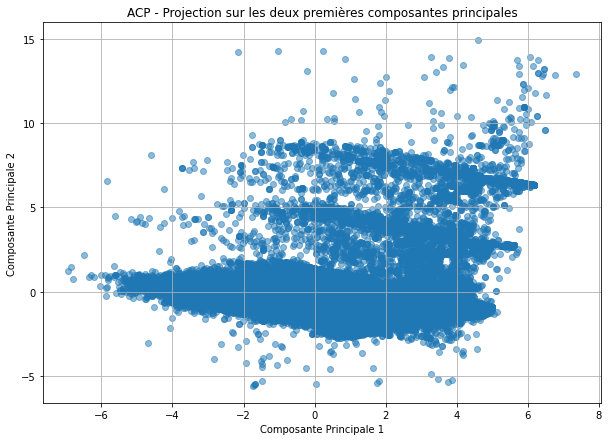

In [357]:
# Visualisation des composantes principales
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
plt.title('ACP - Projection sur les deux premières composantes principales')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.grid(True)
plt.show()

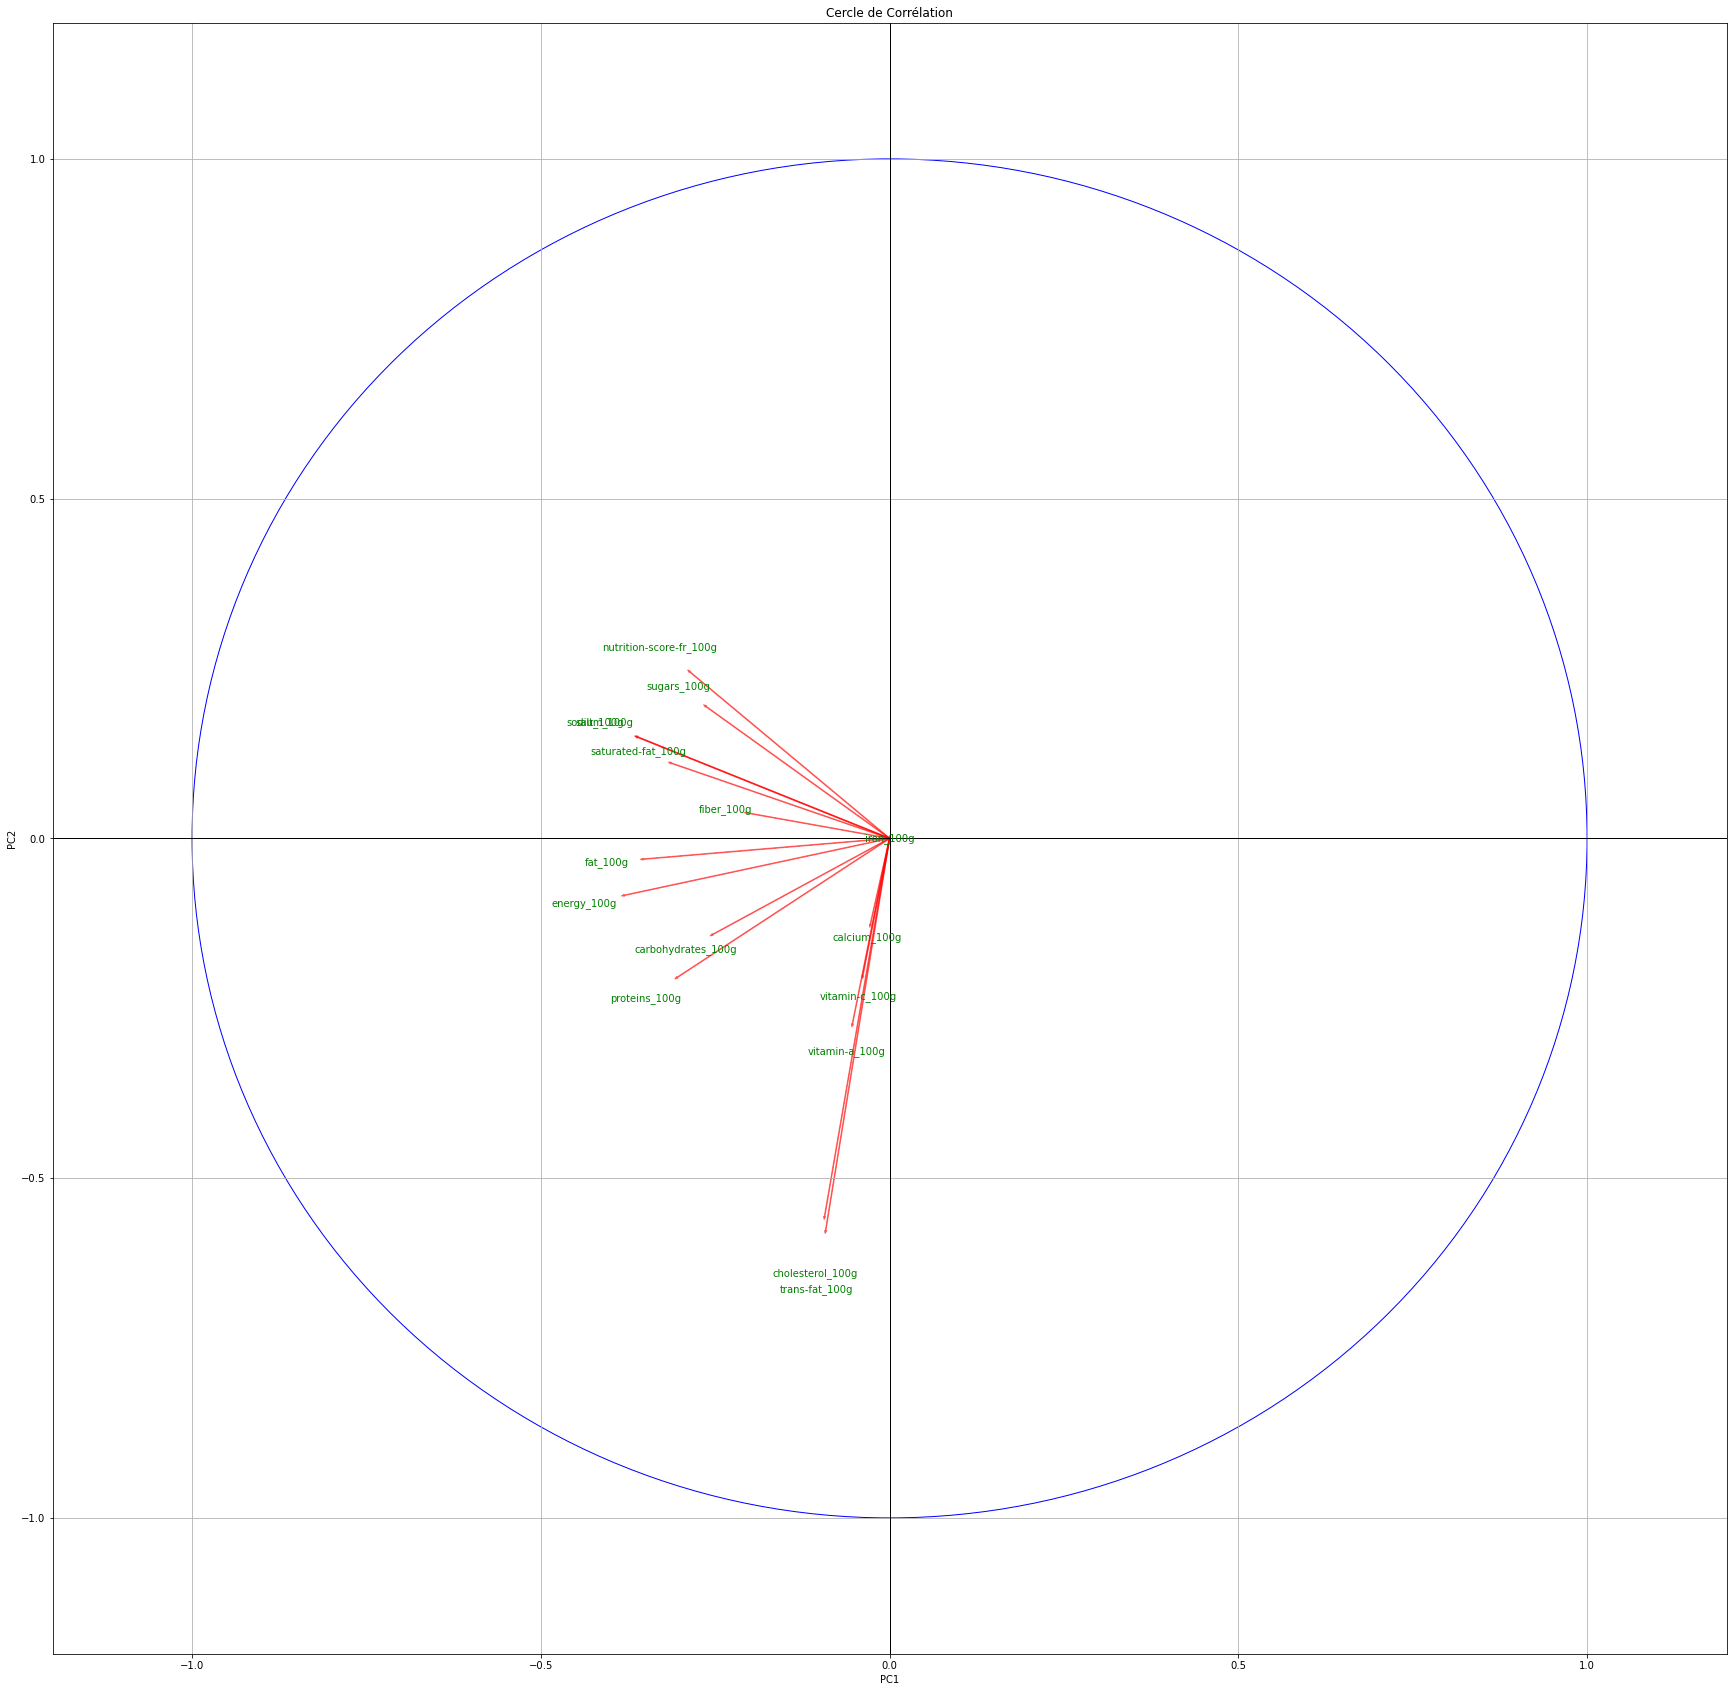

In [359]:
# Fonction pour tracer le cercle de corrélation
def plot_correlation_circle(pca, components, labels):
    plt.figure(figsize=(30, 30))
    for i in range(len(labels)):
        plt.arrow(0, 0, components[i, 0], components[i, 1], 
                  color='r', alpha=0.5)
        plt.text(components[i, 0] * 1.15, components[i, 1] * 1.15, 
                 labels[i], color='g', ha='center', va='center')

    # Dessin du cercle
    circle = plt.Circle((0, 0), 1, color='b', fill=False)
    plt.gca().add_artist(circle)

    plt.xlim(-1.2, 1.2)
    plt.ylim(-1.2, 1.2)
    plt.axhline(0, color='black', lw=1)
    plt.axvline(0, color='black', lw=1)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid()
    plt.title('Cercle de Corrélation')
    plt.show()

# Calcul des composantes pour le cercle de corrélation
components = pca.components_.T
labels = df_final.columns.dropna()

# Tracé du cercle de corrélation
plot_correlation_circle(pca, components, labels)
